# **Como determinar a qualidade de um vinho?**

Quando pensamos em um bom vinho, lembramos de vários elementos sensoriais como aroma, cor e sabor para definir se gostamos ou não daquela taça em nossas mãos.


Alguns especialistas dizem que para que um vinho seja considerado bom, três elementos precisam estar em equilíbrio: álcool, taninos e acidez.

Mas será que existe uma forma de prever se um vinho é bom ou não somente considerando suas características químicas? 

Neste artigo faremos uma análise de um dataset (banco de dados) de vinhos tintos e usando algoritmos de machine learning, tentaremos prever se um determinado tipo de vinho é bom ou não levando em consideração suas características físico-químicas. 



Para começar importaremos as bibliotecas necessárias para o carregamento e análise inicial do nosso dataset.

In [ ]:

# Importação das bibliotecas

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt




### Lendo e definindo o dataset

In [ ]:
df = pd.read_csv("/content/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Vamos verificar inicialmente quantas instâncias e características nosso dataset possui.

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Usando o método describe podemos verificar como está a dispersão dos valores, assim como a média e mediana. 

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Nossa variável de interesse é a qualidade ('quality') do vinho, então vamos verificar como esta variável está distribuída no dataset.

In [ ]:
df.quality.nunique()

6

In [ ]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


Considerando que quality 3 significa um vinho de qualidade inferior e 8 um vinho de qualidade superior, vemos que a maioria dos vinhos no nosso dataset tem qualidade mediana, com instâncias em torno da qualidade 5 - 6. 

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Acima notamos que nosso dataset não possui dados em branco ou nulos, então podemos prosseguir com a separação e pré-processamento dos dados. 

In [ ]:
X = df.drop('quality', axis=1).values
y = df['quality'].values

Mas será que existe alguma correlação entre as variáveis Alcool, pH, Acidez e qualidade conforme mencionamos no início deste artigo?


Vamos fazer uma análise rápida usando o Coeficiente de Pearson para medir a correlação. 

In [ ]:
from scipy.stats.stats import pearsonr

In [ ]:
fa = df['fixed acidity']
ph = df['pH']
qly = df['quality']
alc = df['alcohol']

# Calculando o Coeficiente de Pearson entre as variáveis

coeficiente_pearson, p_valor = pearsonr(fa, ph)
coeficiente_pearson


-0.6829781945685314

Text(0, 0.5, 'pH')

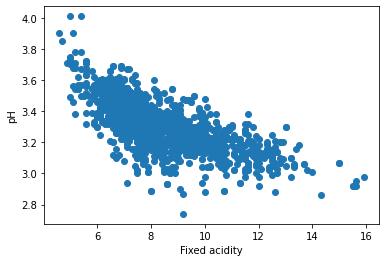

In [ ]:
plt.scatter(fa, ph)
plt.xlabel('Fixed acidity')
plt.ylabel('pH')

Aqui percebemos uma correlação negativa entre as variáveis pH e Acidez, mostrando que enquanto a acidez aumenta, o pH diminui. 

In [ ]:
coeficiente_pearson, p_valor = pearsonr(qly, alc)
coeficiente_pearson

0.47616632400113607

Text(0, 0.5, 'Alcool')

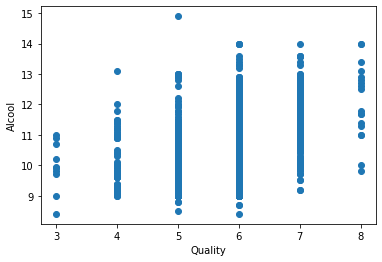

In [ ]:
plt.scatter(qly, alc)
plt.xlabel('Quality')
plt.ylabel('Alcool')

No entanto, quando correlacionamos as variáveis Álcool e Qualidade do vinho, não conseguimos perceber nenhuma correlação entre estas variáveis, mostrando que o álcool não influencia na qualidade do vinho tinto. 

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)# divide 30% para teste

In [ ]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)
                        

Como existem varíaveis com valores discrepantes entre si, fizemos uma normalização dos valores usando o objeto MinMaxScaler. Assim garantimos que o algoritmo irá trabalhar dentro de uma mesma gama de valores. 

### Mostrando a média e desvio padrão das features sem normalização

In [ ]:
print("Média das features não normalizadas: {}".format(np.mean(X))) 
print("Desvio padrão das features não normalizadas: {}".format(np.std(X)))

Média das features não normalizadas: 8.134219224515322
Desvio padrão das features não normalizadas: 16.726533979432848


### Mostrando a média e o desvio padrão das features normalizadas

In [ ]:
print("Média das features normalizadas: {}".format(np.mean(X_scaled))) 
print("Desvio padrão das features normalizadas: {}".format(np.std(X_scaled)))

Média das features normalizadas: 0.2670565420619084
Desvio padrão das features normalizadas: 0.18710631530180108


### Importando nosso primeiro algoritmo, KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Setup the pipeline steps

# steps = [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))]

In [ ]:
# Create the Pipeline

# pipeline = Pipeline(steps)

In [ ]:
# Create test, train splits

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

Para esta primeira análise, iremos usar o algoritmo KNN. Abaixo faremos o treinamento do algoritmo e na sequência a previsão dos dados. 

In [ ]:
# Fit the pipeline to the training set: knn_scaled

clf_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train) # aplica a classificação



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Instantiate and fit a KNN classifier to the unscaled data

# knn_unscaled = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [ ]:
# Compute and print metrics

print('Accuracy with Scaling: {}'.format(clf_KNN.score(X_test, y_test)))
# print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.575


In [ ]:
# Realiza a previsão

y_pred = clf_KNN.predict(X_test)

Para saber como foi nossa previsão, montaremos uma Matrix de Confusão e verificaremos a acurácia deste nosso modelo. 

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   1   1   0   0]
 [  0   0  11   6   0   0]
 [  0   1 140  58   5   0]
 [  0   1  57 116  19   0]
 [  0   0   8  32  20   0]
 [  0   0   0   3   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.65      0.69      0.67       204
           6       0.54      0.60      0.57       193
           7       0.44      0.33      0.38        60
           8       0.00      0.00      0.00         4

    accuracy                           0.57       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.55      0.57      0.56       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


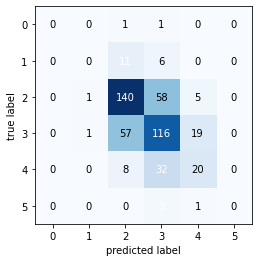

In [ ]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Para o algoritmo KNN, tivemos uma acurácia próxima a 57%, que é baixa para prever com segurança em dados reais. Vamos usar outros algoritmos para ver se conseguirmos melhorar esta acurácia. 

### Usando o SVC para prever os dados 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Montar o pipeline

steps = [('scaler', MinMaxScaler()), ('SVM', SVC(gamma='auto', kernel='rbf'))]
pipeline = Pipeline(steps)

In [ ]:
# Ajustar para os dados de treinamento usando SVM

clf_svm = pipeline.fit(X_train, y_train)

In [ ]:
# Prever os valores usando os dados de teste

y_pred = pipeline.predict(X_test)

In [ ]:
# Conferir e imprimir a acurácia

print("Acurácia: {}".format(clf_svm.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Acurácia: 0.5833333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.62      0.83      0.71       204
           6       0.54      0.58      0.56       193
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00         4

    accuracy                           0.58       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.48      0.58      0.52       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


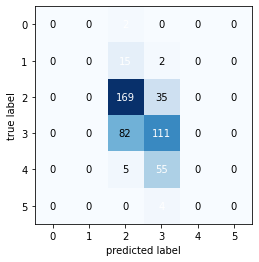

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Com o algoritmo SVM a acurácia ficou em 58%, ainda baixa para uma previsão segura. Vamos continuar avaliando outros algoritmos. 

### Usando a Árvore de Decisão DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

In [ ]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

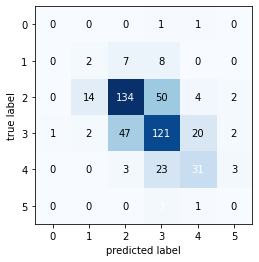

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
# Compute and print metrics

print("Acurácia: {}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Acurácia: 0.6
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.11      0.12      0.11        17
           5       0.70      0.66      0.68       204
           6       0.59      0.63      0.61       193
           7       0.54      0.52      0.53        60
           8       0.00      0.00      0.00         4

    accuracy                           0.60       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.61      0.60      0.60       480



Com o algoritmos Árvore de Decisão conseguimos uma acurácia de 60%. Estamos melhorando mas ainda longe de uma boa acurácia. 

### Usando o algoritmo Floresta Randômica RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier # importa o classificador árvore randômica
from sklearn import metrics #importa as métricas para avaliação

In [ ]:
# Cria o objeto de classificação através do 
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

# Realiza o treinamento do classificador
clf_floresta = clf_floresta.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_floresta.predict(X_test)

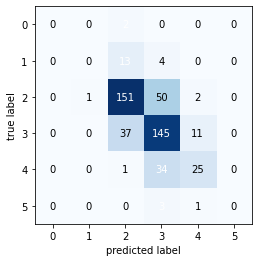

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
# Compute and print metrics

print("Acurácia: {}".format(clf_floresta.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Acurácia: 0.66875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.74      0.74      0.74       204
           6       0.61      0.75      0.68       193
           7       0.64      0.42      0.51        60
           8       0.00      0.00      0.00         4

    accuracy                           0.67       480
   macro avg       0.33      0.32      0.32       480
weighted avg       0.64      0.67      0.65       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Com o algoritmo de Florestas Randômicas conseguimos chegar a 67%, melhorando bastante desde nossa primeira análise usando o KNN. 

Mas será que ainda há espaço para melhora? E se usarmos Redes Neurais, o que acontece?

### Usando Redes Neurais

Vamos usar o algoritmo MLPC para tentar aumentar a acurácia e verificar a aplicação das redes neurais para este tipo de classificação.

In [ ]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier

In [ ]:
#define a configuração da rede
clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1) #rede com 5 escondidas com 5 neurônios cada 

In [ ]:
#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#realiza a previsão
y_pred=clf_mlp.predict(X_test)

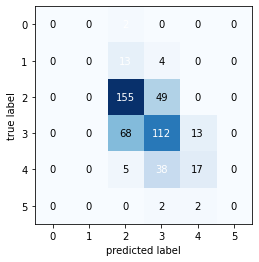

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
# Compute and print metrics

print("Acurácia: {}".format(clf_mlp.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Acurácia: 0.5916666666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.64      0.76      0.69       204
           6       0.55      0.58      0.56       193
           7       0.53      0.28      0.37        60
           8       0.00      0.00      0.00         4

    accuracy                           0.59       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.56      0.59      0.57       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Uau! Veja que interessante, a acurácia **baixou** para 59%, mostrando que o algoritmo de rede neural piorou a previsão dos dados.

Percebemos então com o exercício que o melhor algoritmo foi o Floresta Randômica (Random Forest) que teve uma acurácia de 67%. 

Obviamente poderíamos fazer algumas modificações nos hiperparâmetros ou no pré processamento para aumentar a acurácia, mas o objetivo deste artigo foi simplesmente mostrar os diversos tipos de algoritmo usando configurações simples para resolver uma questão de negócio. 

Na próxima vez que for tomar uma taça de vinho lembre que além das características químicas e sensoriais, existem algoritmos de inteligência artificial que provavelmente em algum lugar do mundo estarão analisando dados e emitindo opiniões sobre esta bebida tão apreciada por nós! 

# Apêndice:

Transformando a variável target 'quality' em variável binária para processamento. 

In [ ]:
df2 = df.copy()

In [ ]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df2.quality[df2.quality <= 5] = 0
df2.quality[df2.quality > 5] = 1

df2.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
df2.quality.nunique()

2